In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import qutip

In [2]:
def tp(x, y):
    return qutip.tensor(x, y)

# Operators.
σx = qutip.Qobj([[0,1],[1,0]])
σy = qutip.Qobj([[0,-1j],[1j,0]])
σz = qutip.Qobj([[1,0],[0,-1]])
ide = qutip.Qobj(np.eye(2))
σp = (σx + 1j * σy)/2
σm = σp.dag()

# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
g = 0.1

# Simulation parameters.
number_trajectories = 400
dt = 0.01
t_final = 50

H = ωA * tp(σz, ide) + ωB * tp(ide, σz) + ΩA * tp(σx, ide) + ΩB * tp(ide, σx) + g * (tp(σp, σm) + tp(σm, σp))

M = np.sqrt(γ) * tp(ide, σm)
M_l = [M]

num_op_B = qutip.Qobj([[0,0],[0,1]])
num_op_B_overall = tp(ide, num_op_B)

ψ0 = tp(qutip.Qobj([[1],[0]]), qutip.Qobj([[1],[0]]))

t_range = np.arange(0, t_final, dt)

In [3]:
result = qutip.ssesolve(H, ψ0, t_range, M_l, [num_op_B_overall], ntraj=number_trajectories)

10.0%. Run time:   2.38s. Est. time left: 00:00:00:21
20.0%. Run time:   4.82s. Est. time left: 00:00:00:19
30.0%. Run time:   7.18s. Est. time left: 00:00:00:16
40.0%. Run time:   9.63s. Est. time left: 00:00:00:14
50.0%. Run time:  12.14s. Est. time left: 00:00:00:12
60.0%. Run time:  14.48s. Est. time left: 00:00:00:09
70.0%. Run time:  16.85s. Est. time left: 00:00:00:07
80.0%. Run time:  19.28s. Est. time left: 00:00:00:04
90.0%. Run time:  21.53s. Est. time left: 00:00:00:02
Total run time:  23.76s


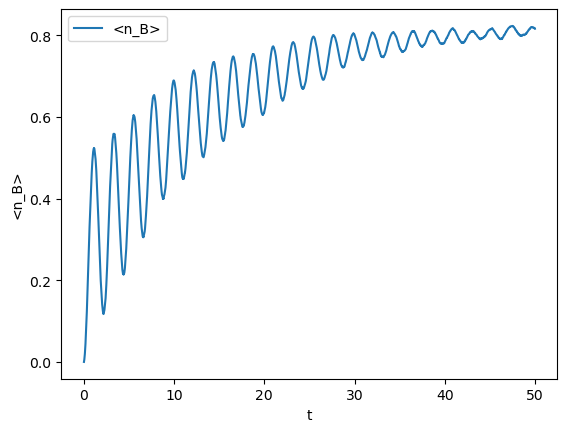

In [4]:
exp_vals = result.expect[0]
plt.plot(t_range, exp_vals, label="<n_B>")
plt.xlabel("t")
plt.ylabel("<n_B>")
plt.legend()
plt.show()

10.0%. Run time:   2.19s. Est. time left: 00:00:00:19
20.0%. Run time:   4.38s. Est. time left: 00:00:00:17
30.0%. Run time:   6.61s. Est. time left: 00:00:00:15
40.0%. Run time:   8.93s. Est. time left: 00:00:00:13
50.0%. Run time:  11.12s. Est. time left: 00:00:00:11
60.0%. Run time:  13.30s. Est. time left: 00:00:00:08
70.0%. Run time:  15.51s. Est. time left: 00:00:00:06
80.0%. Run time:  17.70s. Est. time left: 00:00:00:04
90.0%. Run time:  19.91s. Est. time left: 00:00:00:02
Total run time:  22.09s
10.0%. Run time:   2.19s. Est. time left: 00:00:00:19
20.0%. Run time:   4.39s. Est. time left: 00:00:00:17
30.0%. Run time:   6.59s. Est. time left: 00:00:00:15
40.0%. Run time:   8.98s. Est. time left: 00:00:00:13
50.0%. Run time:  11.26s. Est. time left: 00:00:00:11
60.0%. Run time:  13.44s. Est. time left: 00:00:00:08
70.0%. Run time:  15.70s. Est. time left: 00:00:00:06
80.0%. Run time:  17.99s. Est. time left: 00:00:00:04
90.0%. Run time:  20.17s. Est. time left: 00:00:00:02
Tota

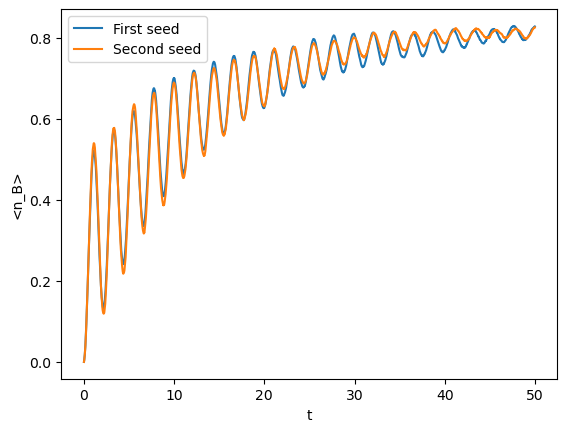

In [5]:
number_trajectories = 400

options_1 = qutip.Options(seeds = [2])
options_2 = qutip.Options(seeds = [4])

result_seed_1 = qutip.ssesolve(H, ψ0, t_range, M_l, [num_op_B_overall], ntraj=number_trajectories, options=options_1)
result_seed_2 = qutip.ssesolve(H, ψ0, t_range, M_l, [num_op_B_overall], ntraj=number_trajectories, options=options_2)

exp_vals_1 = result_seed_1.expect[0]
exp_vals_2 = result_seed_2.expect[0]
plt.plot(t_range, exp_vals_1, label="First seed")
plt.plot(t_range, exp_vals_2, label="Second seed")
plt.xlabel("t")
plt.ylabel("<n_B>")
plt.legend()
plt.show()

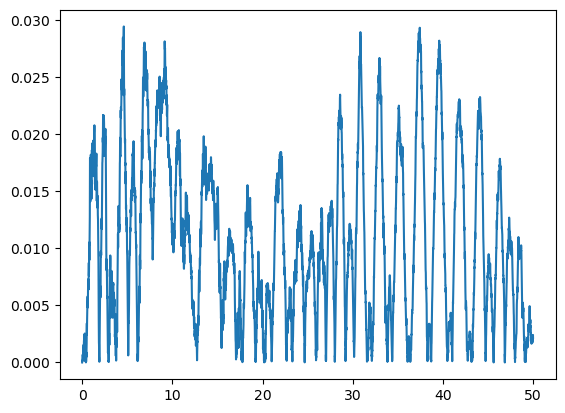

In [6]:
error_vector = abs(exp_vals_1 - exp_vals_2)
plt.plot(t_range, error_vector)

In [7]:
error_quantifier = spla.norm(error_vector)
print(error_quantifier)

0.9172888126366149


In [8]:
f_out = open("results_qutip.txt", "w")
for x in exp_vals_1:
    f_out.write(str(x) + "\n")
f_out.close()

In [9]:
ρ0 = qutip.ket2dm(ψ0)
results_exact = qutip.mesolve(H, ρ0, t_range, M_l, [num_op_B_overall])
exp_vals_exact = results_exact.expect[0]

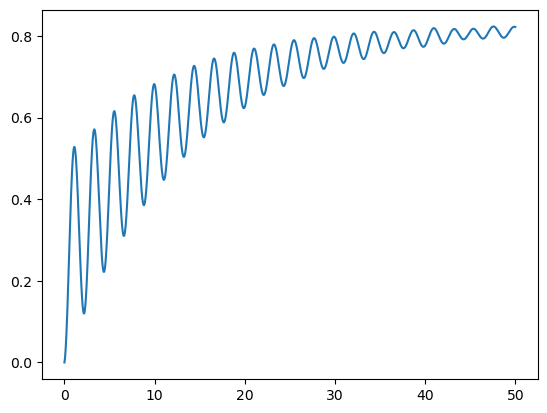

In [10]:
plt.plot(t_range, exp_vals_exact)
plt.show()

In [11]:
f_out = open("results_exact.txt", "w")
for x in exp_vals_exact:
    f_out.write(str(x) + "\n")
f_out.close()